## Week 4
### More on regression (continued from last week)
#### Read in data again

In [3]:
import matplotlib.pyplot as py
import numpy as np
import matplotlib.pyplot as py

In [17]:
#***read in burned area file***
filename = "burnedarea.txt"
filedata  = np.loadtxt(filename, skiprows=1, delimiter =",") #the data are separated by commas
years     = filedata[:,0]
areatotal = filedata[:,1]

nyears    = len(years)

#### Matrix multiplication method

Solve for the slope and intercept explicitly using matrices
w = (A.T * A)^-1 * (A.T * y)

In [5]:
ones = np.ones(nyears)
A = np.vstack((years, ones)).T #two columns: years and ones

In [6]:
p1 = np.dot(A.T, areatotal) #dot product
p2 = np.dot(A.T, A)
p3 = np.linalg.inv(p2)
w = np.dot(p3, p1)
print('Matrix multiplication solution: slope {:.2f} intercept {:.2f}'.format(w[0], w[1]))

Matrix multiplication solution: slope -7.36 intercept 15253.69


#### numpy polyfit method
The numpy.polyfit function fits a polynomial and returns the vector of coefficients that minimizes the squared error. To do linear regression, we would fit a first-degree polynomial and get the slope and intercept

In [7]:
wcoeff = np.polyfit(years, areatotal, 1) #The 1 specifies first-degree (linear, not quadratic or cubic, etc)

In [8]:
print(wcoeff)

[-7.36187297e+00  1.52536923e+04]


Text(0.5, 1.0, 'Global Fire Emissions Database Timeseries')

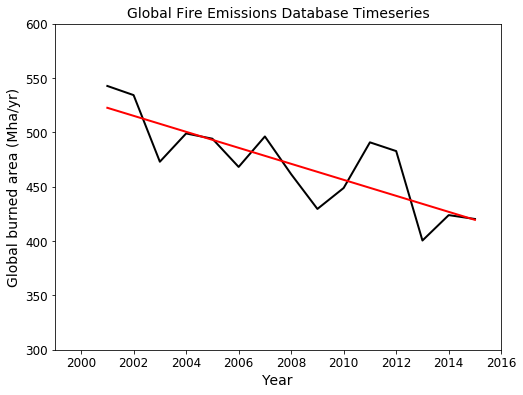

In [9]:
#plot 
fig = py.figure(figsize=(8,6)) # size is optional
my_font_size = 12
ax1 = fig.add_subplot(1,1,1) # (rows, cols, plot)
ax1.plot(years, areatotal, color="black", linewidth=2)

ypoly = wcoeff[0]*years + wcoeff[1]
ax1.plot(years, ypoly, color='red', linewidth=2)

ax1.set_ylim(300, 600)
ax1.set_xlim(1999, 2016)
ax1.set_ylabel("Global burned area (Mha/yr)", fontsize = my_font_size + 2)
ax1.set_xlabel("Year", fontsize = my_font_size+ 2)
ax1.tick_params(labelsize = my_font_size)
ax1.set_title("Global Fire Emissions Database Timeseries", fontsize = my_font_size +2)

We can also us np.polyfit to get a second-order polynomial (a quadratic fit). We will have 3 coefficients: one for the squared term, one for the linear term, and one for the intercept

In [10]:
w3coeff = np.polyfit(years, areatotal, 2)
ypoly2 = w3coeff[0]*years**2 + w3coeff[1]*years + w3coeff[2]

Text(0.5, 1.0, 'Global Fire Emissions Database Timeseries')

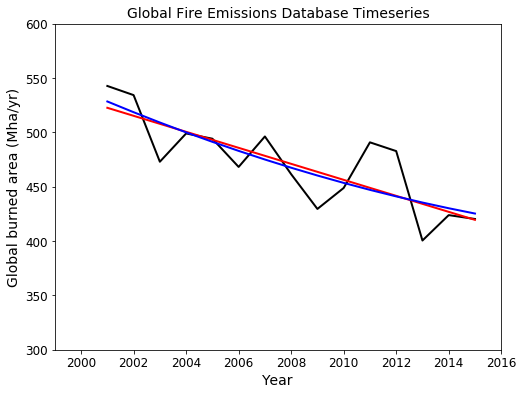

In [11]:
#plot 
fig = py.figure(figsize=(8,6)) # size is optional
my_font_size = 12
ax1 = fig.add_subplot(1,1,1) # (rows, cols, plot)
ax1.plot(years, areatotal, color="black", linewidth=2)

ypoly = wcoeff[0]*years + wcoeff[1]
ax1.plot(years, ypoly, color='red', linewidth=2)
ax1.plot(years, ypoly2, color='blue', linewidth=2)

ax1.set_ylim(300, 600)
ax1.set_xlim(1999, 2016)
ax1.set_ylabel("Global burned area (Mha/yr)", fontsize = my_font_size + 2)
ax1.set_xlabel("Year", fontsize = my_font_size+ 2)
ax1.tick_params(labelsize = my_font_size)
ax1.set_title("Global Fire Emissions Database Timeseries", fontsize = my_font_size +2)

The second-order polynomial (blue) doesn't add much information. A linear fit is sufficient

#### Revisiting the scipy method

In [12]:
import scipy.stats as stats

In [15]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(years, areatotal) #gives 5 outputs
print('scipy method slope {:.3f} and intercept {:.3f}'.format(slope, intercept))
print('correlation: {:.3f} and p-value: {:.3f}'.format(rvalue, pvalue))

scipy method slope -7.362 and intercept 15253.692
correlation: -0.800 and p-value: 0.000


p-value is less than 0.05, so we accept this trend as "significant"

### Notes on regression and correlation significance
Create 10 sets of random data. Usually even random data have some correlation, but the correlation should only be significant about once in 20 cases

r =  0.08286858205243941 p =  0.7690560306439715


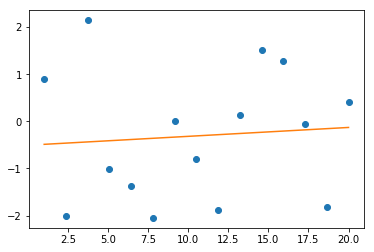

r =  0.14740851522611878 p =  0.6000972119460777


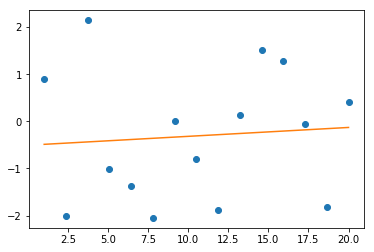

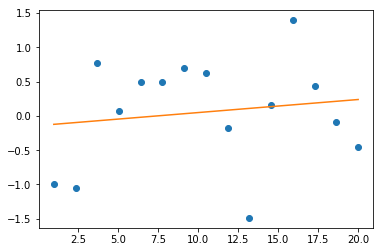

r =  0.07235396174177357 p =  0.7977578470056678


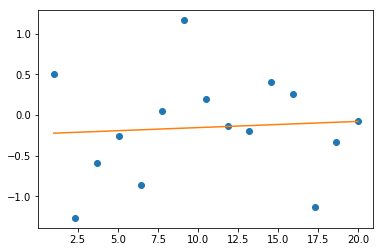

r =  -0.08268501853896654 p =  0.7695548362274633


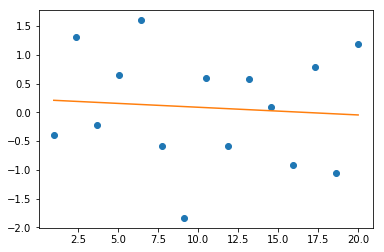

r =  0.36191031542582003 p =  0.18499063270511099


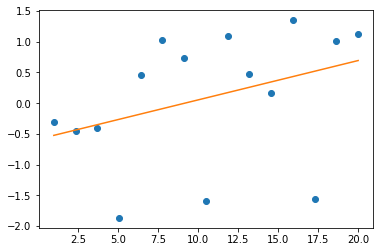

r =  -0.19579943728516155 p =  0.4843297245698829


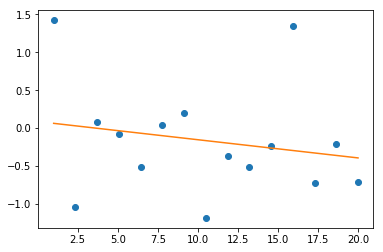

r =  0.13614128510275258 p =  0.6285328911600077


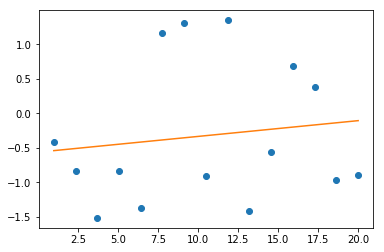

r =  0.5038253316548895 p =  0.055511225325803014


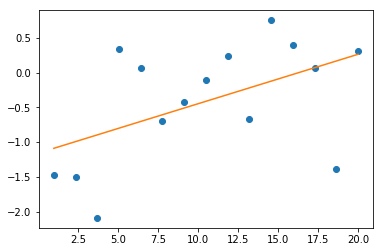

r =  0.41864361054470023 p =  0.12040174132119444


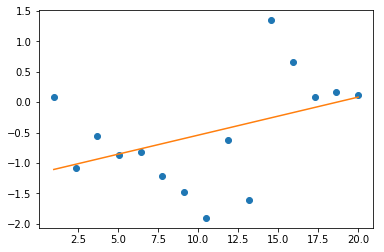

r =  -0.2015505799992743 p =  0.47132432542010116


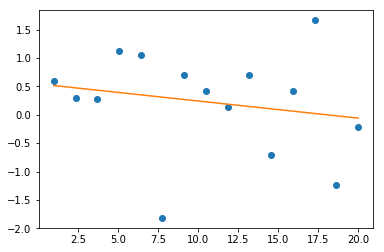

In [28]:
npoints = 15
ncases = 10
rdata = np.zeros(ncases)
pvalues = np.zeros(ncases)

py.close('all') #close any of your open figures

for i in range(ncases):
    xdata = np.linspace(1, 20, npoints)
    ydata = np.random.randn(npoints)  #randn for random numbers from a Gaussian (normal) distribution
    
    slope, intercept, rdata[i], pvalues[i], stderr = stats.linregress(xdata, ydata)
    yfit = slope*xdata + intercept
    
    print('r = ', rdata[i], 'p = ', pvalues[i])
    
    #plot
    fig = py.figure(i)
    py.plot(xdata, ydata, 'o') #o for circles
    py.plot(xdata, yfit)
    py.show(i)

Next, make a histogram of the correlation coefficients (rvalues)

(-1, 1)

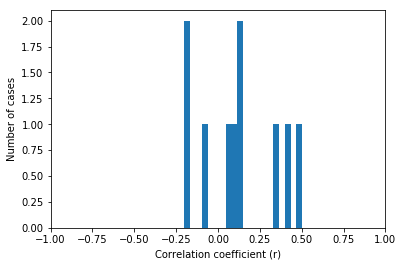

In [32]:
fig = py.figure()
n, bins, patches = py.hist(rdata, bins=20)
py.xlabel('Correlation coefficient (r)')
py.ylabel('Number of cases')
py.xlim((-1,1))

If we repeat but increase from 10 to 1,000 cases, we get a more normal distribution

(-1, 1)

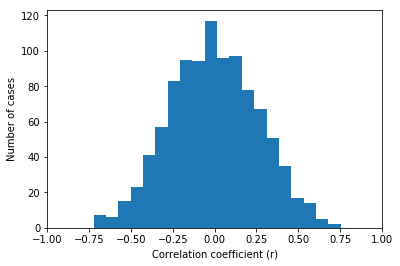

In [33]:
ncases = 1000
rdata = np.zeros(ncases)
pvalues = np.zeros(ncases)

for i in range(ncases):
    xdata = np.linspace(1, 20, npoints)
    ydata = np.random.randn(npoints)  #randn for random numbers from a Gaussian (normal) distribution

    slope, intercept, rdata[i], pvalues[i], stderr = stats.linregress(xdata, ydata)

fig = py.figure()
n, bins, patches = py.hist(rdata, bins=20)
py.xlabel('Correlation coefficient (r)')
py.ylabel('Number of cases')
py.xlim((-1,1))

We can check that approximately the top 5% of cases should have p<0.05

In [35]:
sortedrvalues = np.sort(rdata)
pindex = int(ncases*0.95) #95th percentile

print('For {} points in the timeseries'.format(npoints))
print('A correlation of {:.2f} is significant'.format(sortedrvalues[pindex]))

For 15 points in the timeseries
A correlation of 0.42 is significant


For 15 points, any correlation higher than about 0.42 should happen less than 1 time in 20, making it statistically significant. If you had fewer points (10), it would be easier to get higher correlations by random chance. For more points, the distribution gets narrower, and a lower correlation can be statistically significant. Play around with this and understand it for the exam